# Check of the influence of the seed on the calculation of the forgotten events

Files needed:
* the dataframes for different seeds (obtained by running the *count_forgotten_events.ipynb* on the proper results for each seed):
    * forgetting-seed10.csv
    * forgetting-seed20.csv
    * forgetting-seed42.csv

Variables to set: **dataframes_path**, **datapath_seed10**, **datapath_seed20**, **datapath_seed42**

Outputs:
* "files/": the full dataframe (non-ordered by forgotten events). ALl the reduced datasets files
* "figures/": the plots

In [1]:
import csv
import numpy as np
import pandas as pd
from scipy import stats
import math

dataframes_path = "path/to/dataframes"   # likely "files"
df_seed10 = pd.read_csv(dataframes_path + "/forgetting-seed10.csv")
df_seed20 = pd.read_csv(dataframes_path + "/forgetting-seed20.csv")
df_seed42 = pd.read_csv(dataframes_path + "/forgetting-seed42.csv")


In [1]:
savepath = "figures"
%mkdir -p figures

In [3]:
# Check on the dataframes

check = df_seed10['source'].values == df_seed20['source'].values
print(np.mean(check))
check = df_seed10['target'].values == df_seed20['target'].values
print(np.mean(check))
check = df_seed20['source'].values == df_seed42['source'].values
print(np.mean(check))
check = df_seed42['target'].values == df_seed42['target'].values
print(np.mean(check))

1.0
1.0
1.0
1.0


### Compute Pearson correlation coefficient

In [5]:
# Substitute a high numerical value to the samples with math.inf in order to compute the standard deviation

df_seed10_new = np.where(df_seed10['forgotten_events_with_inf'].values==math.inf, \
                         50, df_seed10['forgotten_events_with_inf'].values)
df_seed20_new = np.where(df_seed20['forgotten_events_with_inf'].values==math.inf, \
                         50, df_seed20['forgotten_events_with_inf'].values)
df_seed42_new = np.where(df_seed42['forgotten_events_with_inf'].values==math.inf, \
                         50, df_seed42['forgotten_events_with_inf'].values)


# Pearson correlation coefficients
print(stats.pearsonr(df_seed10_new,df_seed20_new))
print(stats.pearsonr(df_seed10_new,df_seed42_new))
print(stats.pearsonr(df_seed42_new,df_seed20_new))
print(stats.pearsonr(df_seed20_new,df_seed42_new))

(0.8831013322036452, 0.0)
(0.8812281178836392, 0.0)
(0.8810474597870114, 0.0)
(0.8810474597870114, 0.0)


### Compute standard deviation

In [6]:
stdv = []
count_inf = 0
for j in range(0, len(df_seed10_new)):
    row = df_seed10_new[j], df_seed20_new[j], df_seed42_new[j]
    standard_dev = np.std(row)
    stdv.append(standard_dev)

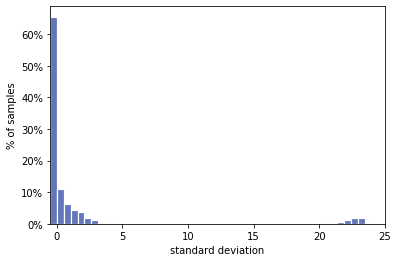

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import PercentFormatter

colors = [ cm.twilight(x) for x in np.linspace(0, 1.0, 5) ]

plt.hist(stdv, bins = np.linspace(-.5, 25, 50), weights=np.ones(len(stdv)) / len(stdv), \
         edgecolor='white', linewidth=1.2, color=colors[1])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlim([-0.5, 25])
plt.xlabel('standard deviation')
plt.ylabel('% of samples')
plt.savefig(savepath + '/freq_of_stdv.pdf', bbox_inches='tight')

### Compute the overlap through seeds for the cleaned datasets

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
paths = ["01perc","1perc","5perc","10perc","15perc","20perc","25perc","30perc","40perc"]


In [12]:
overlap_2 = []
overlap_3 = []
datapath_seed10 = "path/to/cleaned/datasets/seed10"
datapath_seed20 = "path/to/cleaned/datasets/seed20"
datapath_seed42 = "path/to/cleaned/datasets/seed42"

for direct in paths:
    
    with open(datapath_seed42 + direct + "/precursors-train.txt") as f:
        precursors_1=["".join(line.strip().split(" ")) for line in f.readlines()]
    with open(datapath_seed10 + direct + "/precursors-train.txt") as f:
        precursors_2=["".join(line.strip().split(" ")) for line in f.readlines()]
    with open(datapath_seed20 + direct + "/precursors-train.txt") as f:
        precursors_3=["".join(line.strip().split(" ")) for line in f.readlines()]
    with open(datapath_seed42 + direct + "/product-train.txt") as f:
        product_1=["".join(line.strip().split(" ")) for line in f.readlines()]
    with open(datapath_seed10 + direct + "/product-train.txt") as f:
        product_2=["".join(line.strip().split(" ")) for line in f.readlines()]
    with open(datapath_seed20 + direct + "/product-train.txt") as f:
        product_3=["".join(line.strip().split(" ")) for line in f.readlines()]

    rxns_1 = [precursors_1[i] + " >> " + product_1[i] for i in range(len(precursors_1))]
    df_1 = pd.DataFrame(rxns_1)
    df_1.columns = ['rxn']
    rxns_2 = [precursors_2[i] + " >> " + product_2[i] for i in range(len(precursors_2))]
    rxns_3 = [precursors_3[i] + " >> " + product_3[i] for i in range(len(precursors_3))]

    
    df_filter_2 = df_1.isin(rxns_2).values
    df_filter_3 = df_1.isin(rxns_3).values
    df_1['overlap_2'] = df_filter_2
    df_1['overlap_3'] = df_filter_3
    
    length_2=len(df_1.loc[df_1['overlap_2']==True])
    length_3=len(df_1.loc[df_1['overlap_3']==True])
    
    overlap_2.append(length_2/len(df_1)*100)
    overlap_3.append(length_3/len(df_1)*100)
    print(direct,length_2,length_3)

01perc 2374105 2374105
1perc 2331300 2331298
5perc 2154268 2166561
10perc 1947598 2038938
15perc 1896364 1909719
20perc 1850412 1849356
25perc 1666597 1665911
30perc 1524125 1523607
40perc 1273228 1275255


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

colors = [ cm.twilight(x) for x in np.linspace(0, 1.0, 5) ]

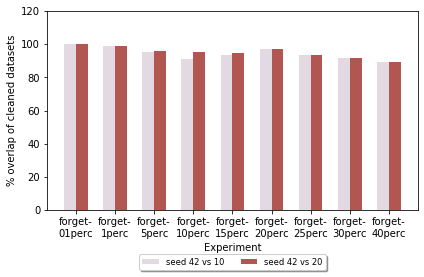

In [15]:
labels=["forget-\n01perc","forget-\n1perc","forget-\n5perc","forget-\n10perc","forget-\n15perc",\
        "forget-\n20perc","forget-\n25perc","forget-\n30perc","forget-\n40perc"]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
plt.bar(x - width/2, overlap_2, width, label="seed 42 vs 10", color = colors[4])
plt.bar(x + width/2, overlap_3, width,  label="seed 42 vs 20", color = colors[3])

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Experiment")
plt.ylabel("% overlap of cleaned datasets")
plt.ylim(0,120)
plt.legend(prop=fontP,loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3)

fig.tight_layout()
plt.savefig(savepath + '/overlap_through_seeds.pdf', bbox_inches='tight')

plt.show()